# 9차세션 복습과제

In [1]:
#!pip install kneed

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.cluster import KMeans
from kneed import KneeLocator
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score
import warnings
warnings.filterwarnings('ignore')

## 문제1 (총 50점)

In [3]:
#문제X
df = pd.read_csv('Mall_Customers.csv')
df.set_index('CustomerID', inplace=True)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


### (1) Gender 변수에 대한 one hot encoding을 진행한 후 아래의 사진과 같은 데이터프레임을 만드세요. (2점)

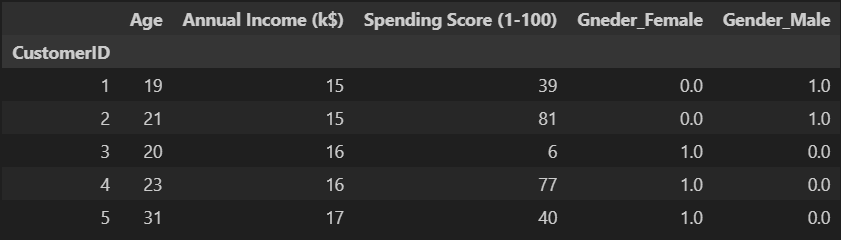

In [4]:
# 문제
# 생성한 데이터프레임은 data 변수에 저장
data = pd.concat([df,pd.get_dummies(df['Gender'], prefix = 'Gender', dtype = 'int64')], axis = 1).drop(columns = 'Gender')
data.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
CustomerID,,,,,
1,19,15,39,0,1
2,21,15,81,0,1
3,20,16,6,1,0
4,23,16,77,1,0
5,31,17,40,1,0


### (2) pairplot을 사용하여 feature 간 관계를 파악한 후, 비교적 뚜렷하게 군집을 나눌 수 있을 것으로 예상되는 변수의 조합을 아래 3개 중 하나 선택하세요.(2점)  




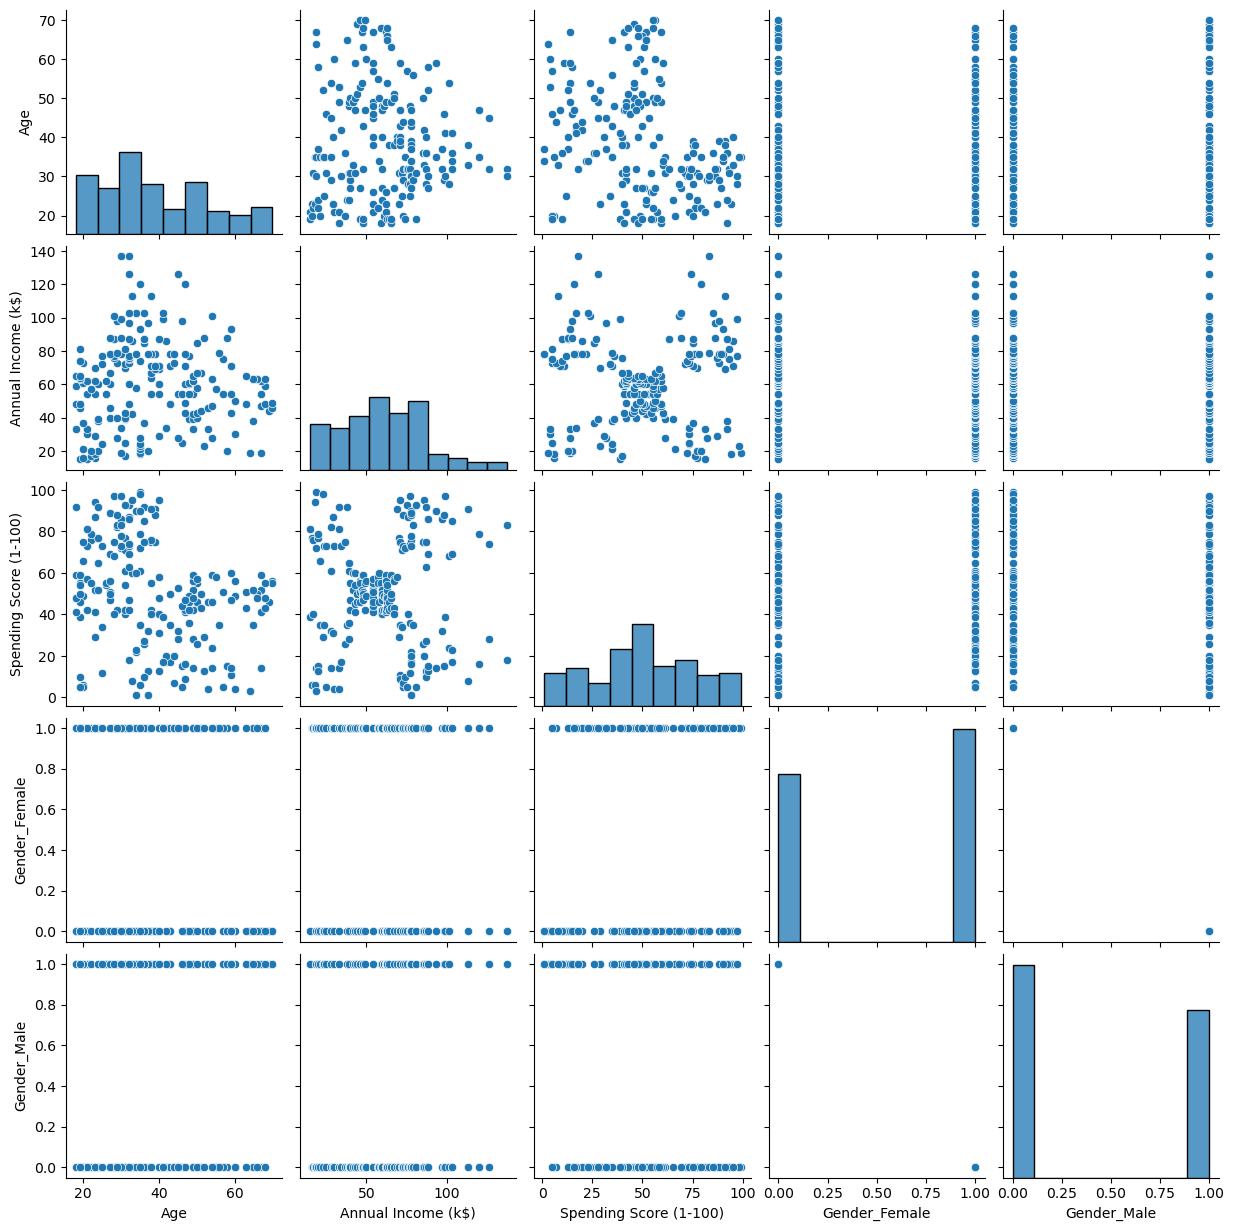

In [5]:
# 문제 
# 출력된 그래프와 동일한 결과를 출력할 수 있도록 코드 작성
sns.pairplot(data)
plt.show()

문제) 비교적 뚜렷하게 군집을 나눌 수 있을 것으로 예상되는 변수의 조합을 아래 3개 중 하나 선택하세요.

a. Age - Annual Income  
b. Annual Income - Spending Score  
c. Spending Score - Age  

In [6]:
#문제 b가 가장 나을 것 같다

In [7]:
# (문제X)
# data에서 Annual Income (k$), Spending Score (1-100) column만 추출

data_1 = data[['Annual Income (k$)', 'Spending Score (1-100)']]
data_1

,Annual Income (k$),Spending Score (1-100)
CustomerID,,
1,15,39
2,15,81
3,16,6
4,16,77
5,17,40
...,...,...
196,120,79
197,126,28
198,126,74


### (3) data_1에 StandardScaler을 이용하여 데이터 스케일링을 수행하세요.  (5점)


In [8]:
# 문제
# 스케일링 한 데이터는 다시 DataFrame으로 만든 후 data_1 변수로 저장
data_1_scaled = StandardScaler().fit_transform(data_1)

data_1 = pd.DataFrame(data_1_scaled, columns = data_1.columns)     # 스케일링한 데이터를 다시 DataFrame으로
data_1

,Annual Income (k$),Spending Score (1-100)
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980
...,...,...
195,2.268791,1.118061
196,2.497807,-0.861839
197,2.497807,0.923953
198,2.917671,-1.250054


### (4) 아래의 출력된 그래프를 참고할 때 K값으로 적절한 값은 무엇인가?(3점)  
참고) Elbow Method란 군집 간의 거리의 합을 나타내는 inertia가 급격히 떨어지는 지점의 K값을 군집의 개수로 사용하는 것이다. 그래프 y축의 SSE는 Sum of Squared Errors로, Inertia라고도 불린다.  
 


a. 1  
b. 3  
c. 5 


In [9]:
# 문제 c일 때 가장 나을 것 같다. 3 -> 4 는 약 50차이, 5 -> 6은 약 10차이라서

In [10]:
# 문제X
# 스케일링한 데이터로 SSE(Sum of Squared Errors, Inertia라고도 불림) 계산
# 클러스터 개수 변화에 따른 SSE 확인, Elbow Point 찾기

def SSE_graph(K, data):
    SSE = []
    k = 1
    while 1 <= k <= K:
        k_means = KMeans(n_clusters = k)     # 클러스터 개수가 k개인 모델 생성
        k_means.fit(data_1)
        SSE.append(k_means.inertia_)     # inertia : sum of squared distances of samples to their closest cluster center
        k += 1
     
    plt.plot(range(1, K+1), SSE, 'o')     # K값에 따른 SSE 표시
    plt.plot(range(1, K+1), SSE, '--')     # SSE값을 연결하는 직선 그리기
    plt.xlabel('K')
    plt.ylabel('SSE')
    kn = KneeLocator(range(1, K+1), SSE, curve = 'convex', direction = 'decreasing')    
    return SSE

[400.0,
 269.29934286898697,
 157.70400815035947,
 108.92131661364357,
 65.56840815571681,
 55.057348270386,
 44.86475569922557,
 37.22935522094306,
 32.36022982569204]

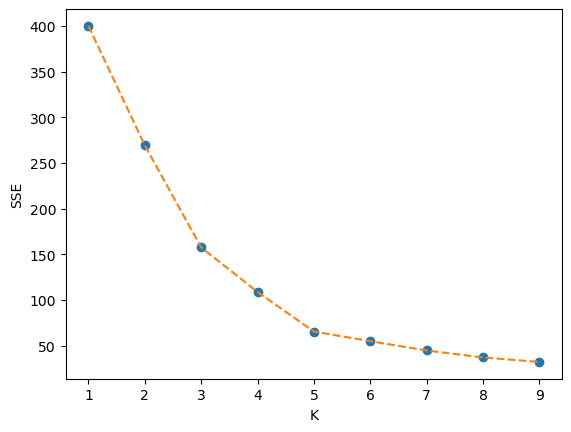

In [11]:
# (문제X)
SSE_graph(K = 9, data = data_1)

### (5) K=4일 때 K-Means Clustering 알고리즘 구현한 후, data로 저장되어 있는 데이터프레임에 'k=4'라는 컬럼을 만들어 군집화 결과를 추가하세요. (8점)

In [12]:
#문제
# K = 4일 때 K-Means Clustering 알고리즘 구현
# 해당 알고리즘은 data 데이터프레임이 아닌 data_1 데이터프레임에 수행해야 함.
kmeans = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, random_state = 0)
kmeans.fit(data_1)

# data 데이터프레임에서 각 행이 어느 클러스터로 분류되었는지 확인할 수 있도록 'k=4' column 추가
# 주의: data_1이 아닌 data 데이터프레임에 추가.
data['K=4'] = kmeans.labels_
data.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male,K=4
CustomerID,,,,,,
1,19,15,39,0,1,3
2,21,15,81,0,1,0
3,20,16,6,1,0,3
4,23,16,77,1,0,0
5,31,17,40,1,0,3


### (6) K = 4일 때 K-Means Clustering의 결과를 시각화 (8점)

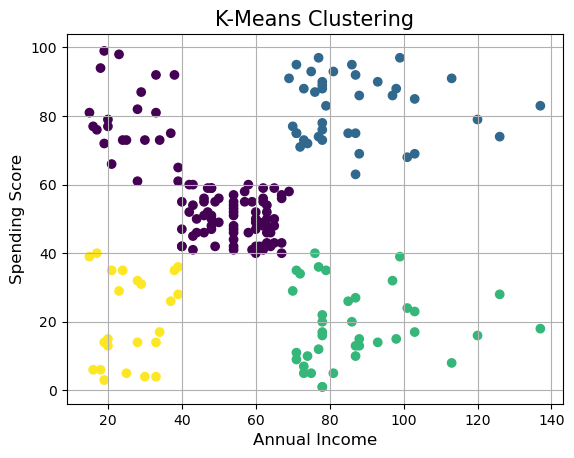

In [13]:
# 문제
# K = 4일 때 K-Means Clustering의 결과를 시각화
# 아래의 출력 결과물과 동일한 그래프를 얻을 수 있도록 '?' 부분 채우기

plt.title("K-Means Clustering", fontsize=15)
plt.scatter(x = data['Annual Income (k$)'], y = data['Spending Score (1-100)'], c = data['K=4'])
plt.xlabel("Annual Income", fontsize=12)
plt.ylabel("Spending Score", fontsize=12)
plt.grid()
plt.show()

### (7) 동일한 과정을 K 값을 5로 수정하여 진행하세요. (8점)

In [14]:
#문제
# K = 5일 때 K-Means Clustering 알고리즘 구현
# 해당 알고리즘은 data 데이터프레임이 아닌 data_1 데이터프레임에 수행해야 함.
kmeans = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, random_state = 0)
kmeans.fit(data_1)

# data 데이터프레임에서 각 행이 어느 클러스터로 분류되었는지 확인할 수 있도록 'k=4' column 추가
# 주의: data_1이 아닌 data 데이터프레임에 추가.
data['K=5'] = kmeans.labels_
data.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male,K=4,K=5
CustomerID,,,,,,,
1,19,15,39,0,1,3,3
2,21,15,81,0,1,0,4
3,20,16,6,1,0,3,3
4,23,16,77,1,0,0,4
5,31,17,40,1,0,3,3


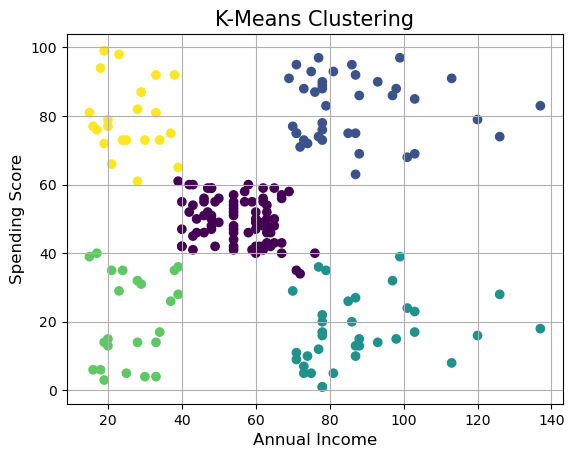

In [15]:
#문제
# K = 5일 때 K-Means Clustering의 결과를 시각화
# 아래의 출력 결과물과 동일한 그래프를 얻을 수 있도록 '?' 부분 채우기

plt.title("K-Means Clustering", fontsize=15)
plt.scatter(x = data['Annual Income (k$)'], y = data['Spending Score (1-100)'], c = data['K=5'])
plt.xlabel("Annual Income", fontsize = 12)
plt.ylabel("Spending Score", fontsize = 12)
plt.grid()
plt.show()

### (8) 군집화가 더 잘 이루어졌을 때의 K의 값은 무엇인가요?  (2점)
a. 4  
b. 5  

In [16]:
#문제: b인 5가 더 잘 군집화 됨

### (9) Silhouette 통계량을 출력해보고 군집 결과가 타당한지에 대해 간단히 서술하시오. (6점)

In [17]:
#문제
# data 속 모든 개별 데이터에 대해 Silhouette 계수 구하기
score_samples_1 = silhouette_samples(data, data['K=4'])
score_samples_2 = silhouette_samples(data, data['K=5'])


# data에 Silhouette 계수 column 추가
data['silhouette_coef_K=4'] = score_samples_1
data['silhouette_coef_K=5'] = score_samples_2


# 모든 데이터의 평균 Silhouette 계수 구하기 
average_score_1 = silhouette_score(data, data['K=4'])
average_score_2 = silhouette_score(data, data['K=5'])


# 결과 확인
print('K = 4일 때 평균 Silhouette 계수: {0:.3f}'.format(average_score_1))
print('K = 5일 때 평균 Silhouette 계수: {0:.3f}'.format(average_score_2))     # Annual Income, Spending Score

K = 4일 때 평균 Silhouette 계수: 0.393
K = 5일 때 평균 Silhouette 계수: 0.447


### (10) data 데이터에서 군집별 평균 평균 Silhouette 계수 구하세요. (6점)

In [18]:
#문제
# 군집별 평균 Silhouette 계수 구하기

#k=4일 때 
print(data.groupby('K=4')['silhouette_coef_K=4'].mean())
#k=5일 때
print(data.groupby('K=5')['silhouette_coef_K=5'].mean())

K=4
0    0.281087
1    0.554139
2    0.475816
3    0.468635
Name: silhouette_coef_K=4, dtype: float64
K=5
0    0.365709
1    0.533544
2    0.441903
3    0.421044
4    0.625439
Name: silhouette_coef_K=5, dtype: float64


## Hierarchical Clustering

### 문제 2

data에서 Annual Income (k$), Spending Score (1-100) column만 추출한 후, 스케일링 진행한 data_1을 확인하세요.

scikit-learn 패키지를 이용하여 병합 군집 알고리즘을 구현합니다.

### 2-1 (10점) - Linkage Criterion = ward


(1) linkage criterion(군집 간 거리 측정 기준) = ward (minimizes the variance of the clusters being merged) 으로 하여 AgglomerativeClustering 객체를 생성해 주세요. (5점)

(단, 클러스터 개수는 가장 군집이 뚜렷하게 구분되었던 5개로 설정)



(2) 아래와 같이 산점도를 이용하여 시각화해주세요. (5점)

In [19]:
# 문제

from sklearn.cluster import AgglomerativeClustering

# AgglomerativeClustering 객체 생성

agg_ward = AgglomerativeClustering(n_clusters = 5, linkage = 'ward')
cluster_pred_1 = agg_ward.fit_predict(data_1)

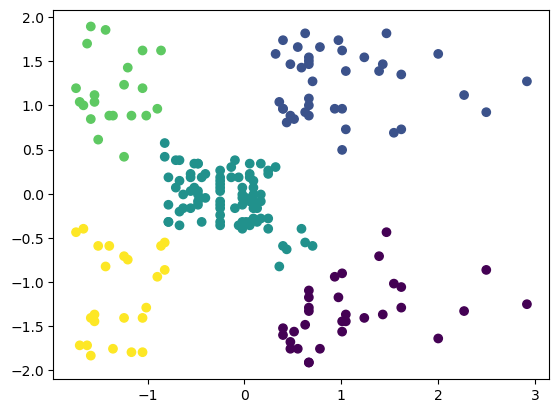

In [20]:
# 문제

# 시각화
plt.scatter(x = data_1['Annual Income (k$)'], y = data_1['Spending Score (1-100)'], c = cluster_pred_1)
plt.show()

### 2-2 (10점) - Linkage Criterion = complete

(1) linkage criterion = complete (uses the maximum distances between all observations of the two sets) 으로 하여 AgglomerativeClustering 객체를 생성해 주세요. (5점)

(단, 클러스터 개수는 가장 군집이 뚜렷하게 구분되었던 5개로 설정)



(2) 아래와 같이 산점도를 이용하여 시각화해주세요. (5점)

In [21]:
# 문제

# AgglomerativeClustering 객체 생성

agg_complete = AgglomerativeClustering(n_clusters = 5, linkage = 'complete')
cluster_pred_2 = agg_complete.fit_predict(data_1)

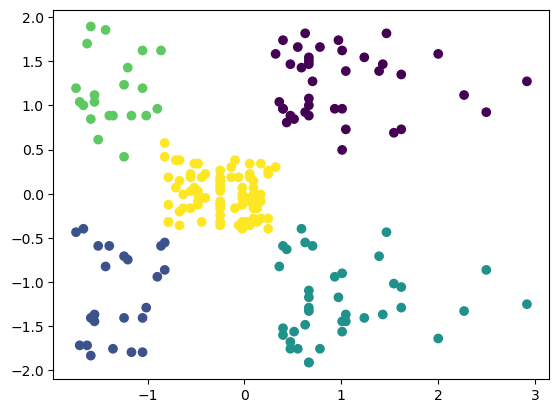

In [22]:
# 문제

# 시각화

plt.scatter(x = data_1['Annual Income (k$)'], y = data_1['Spending Score (1-100)'], c = cluster_pred_2)
plt.show()

### 2-3 (10점) - Linkage Criterion = average

(1) linkage criterion = average (uses the average of the distances of each observation of the two sets) 으로 하여 AgglomerativeClustering 객체를 생성해 주세요. (5점)

(단, 클러스터 개수는 가장 군집이 뚜렷하게 구분되었던 5개로 설정)



(2) 아래와 같이 산점도를 이용하여 시각화해주세요. (5점)

In [23]:
# 문제

# AgglomerativeClustering 객체 생성

agg_aver = AgglomerativeClustering(n_clusters = 5, linkage = 'average')
cluster_pred_3 = agg_aver.fit_predict(data_1)

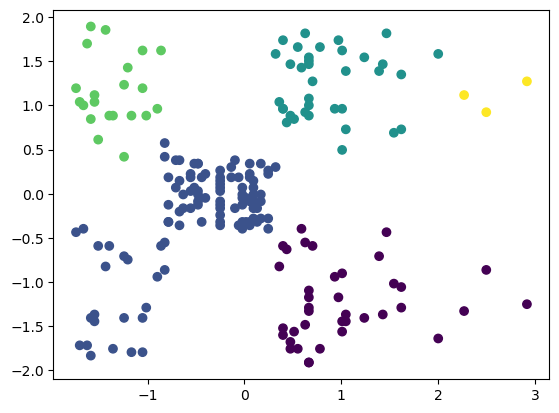

In [24]:
# 문제

# 시각화

plt.scatter(x = data_1['Annual Income (k$)'], y = data_1['Spending Score (1-100)'], c = cluster_pred_3)
plt.show()

### 2-4 (10점) - Linkage Criterion = single

(1) linkage criterion = single (uses the minimum of the distances between all observations of the two sets) 으로 하여 AgglomerativeClustering 객체를 생성해 주세요. (5점)

(단, 클러스터 개수는 가장 군집이 뚜렷하게 구분되었던 5개로 설정)



(2) 아래와 같이 산점도를 이용하여 시각화해주세요. (5점)

In [25]:
# 문제

# AgglomerativeClustering 객체 생성

agg_single = AgglomerativeClustering(n_clusters = 5, linkage = 'single')
cluster_pred_4 = agg_single.fit_predict(data_1)

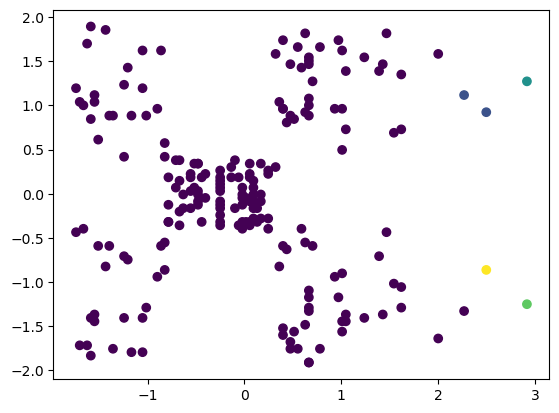

In [26]:
# 문제

# 시각화

plt.scatter(x = data_1['Annual Income (k$)'], y = data_1['Spending Score (1-100)'], c = cluster_pred_4)
plt.show()

### 2-5 (10점) - Linkage Criterion Comparison

(1)' 군집 간 거리 측정 기준 (Linkage Criterion) 4가지를 비교해봤을 때, (A)와 (B) 보다는 (C)와 (D)를 기준으로 Clustering을 진행한 경우 군집이 더 잘 나뉘어진 것으로 보인다.'

위의 문장에서 (A), (B), (C), (D)에 들어갈 말을 각각 쓰시오.

(10점)

(A): average, (B): single, (C): ward, (D): complete

## DBSCAN Clustering

### 문제 3

data에서 Age, Annual Income (k$), Spending Score (1-100) column만 추출한 db_data를 확인하세요.

In [27]:
db_data = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
db_data.head()

,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,
1,19,15,39
2,21,15,81
3,20,16,6
4,23,16,77
5,31,17,40


### 3-1 (10점) - Data Scaling

(1) db_data를 평균이 0, 분산이 1인 표준 정규분포를 따르도록 스케일링 해주세요. (5점)


(2) db_data_1이라는 DataFrame에 스케일링한 db_data를 넣고, column은 위의 3개의 feature를 그대로 유지해주세요. (5점)

In [28]:
# 문제

# 표준 정규 분포를 따르도록 스케일링
db_data_1_scaled = StandardScaler().fit_transform(db_data)

# db_data_1 DataFrame에 위의 변환한 데이터를 넣어주세요
db_data_1 = pd.DataFrame(db_data_1_scaled, columns = db_data.columns)    
db_data_1

,Age,Annual Income (k$),Spending Score (1-100)
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980
...,...,...,...
195,-0.276302,2.268791,1.118061
196,0.441365,2.497807,-0.861839
197,-0.491602,2.497807,0.923953
198,-0.491602,2.917671,-1.250054


### 3-2 (10점) - DBSCAN

(1) DBSCAN 객체를 이용하여 변환한 데이터를 predict에 저장하세요. (5점)


(2) db_concat_1이라는 새로운 DataFrame을 생성하여 기존 DataFrame과 학습 결과를 concat 해주세요 (5점)

In [29]:
#!pip install DBSCAN

In [30]:
# 문제

# DBSCAN 모델링
from sklearn.cluster import DBSCAN
db_model_1 = DBSCAN(eps = 0.5, min_samples = 4)   # hint: (학습에 사용된 feature 개수) + 1
predict = pd.DataFrame(db_model_1.fit_predict(db_data_1), columns=['db_pred'])

In [31]:
# 문제

# 새로운 DataFrame 생성 - 기존 DataFrame과 학습 결과를 concat

db_concat_1 = pd.concat([db_data_1, predict], axis = 1)
db_concat_1

,Age,Annual Income (k$),Spending Score (1-100),db_pred
0,-1.424569,-1.738999,-0.434801,-1
1,-1.281035,-1.738999,1.195704,0
2,-1.352802,-1.700830,-1.715913,-1
3,-1.137502,-1.700830,1.040418,0
4,-0.563369,-1.662660,-0.395980,1
...,...,...,...,...
195,-0.276302,2.268791,1.118061,-1
196,0.441365,2.497807,-0.861839,-1
197,-0.491602,2.497807,0.923953,-1
198,-0.491602,2.917671,-1.250054,-1


### 3-3 (5점) - 시각화

(1) 3차원 시각화를 진행하세요. (5점)

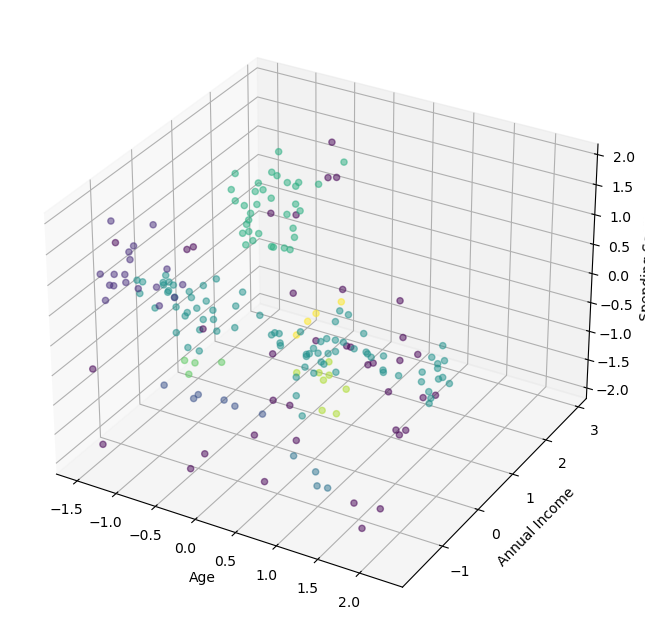

In [32]:
# 문제

# 3차원 시각화

fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot(111, projection='3d')  # 3D subplot 생성
ax.scatter(db_concat_1['Age'], db_concat_1['Annual Income (k$)'], db_concat_1['Spending Score (1-100)'], c = db_concat_1['db_pred'], 
           alpha=0.5)
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income')
ax.set_zlabel('Spending Score')
plt.show()

### 3-4 (5점) - 시각화2

위 경우, 3개의 Feature를 동시에 고려하여 Clustering을 진행할 수 있으나 3차원 상의 Clustering 결과는 사용자 입장에서 한눈에 알아보기 어렵다.
이번에는 2개의 Feature만을 선별하여 학습시켜보자.

In [33]:
# 학습시킬 Feature 선택 - Feature이 2개인 경우

data_1.columns = ['Annual Income (k$)', 'Spending Score (1-100)']
data_1

,Annual Income (k$),Spending Score (1-100)
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980
...,...,...
195,2.268791,1.118061
196,2.497807,-0.861839
197,2.497807,0.923953
198,2.917671,-1.250054


(1) 2-2의 과정을 동일하게 따라하세요. (2.5점)

(2) 2차원 시각화를 진행하세요. (2.5점)

In [34]:
# 문제

# DBSCAN 모델링

db_model_2 = DBSCAN(eps = 0.5, min_samples = 3)   
predict_2 = pd.DataFrame(db_model_2.fit_predict(data_1), columns=['db_pred'])
# 새로운 DataFrame 생성 - 기존 DataFrame과 학습 결과를 concat

db_concat_2 = pd.concat([data_1, predict_2], axis = 1)
db_concat_2

,Annual Income (k$),Spending Score (1-100),db_pred
0,-1.738999,-0.434801,0
1,-1.738999,1.195704,0
2,-1.700830,-1.715913,0
3,-1.700830,1.040418,0
4,-1.662660,-0.395980,0
...,...,...,...
195,2.268791,1.118061,-1
196,2.497807,-0.861839,-1
197,2.497807,0.923953,-1
198,2.917671,-1.250054,-1


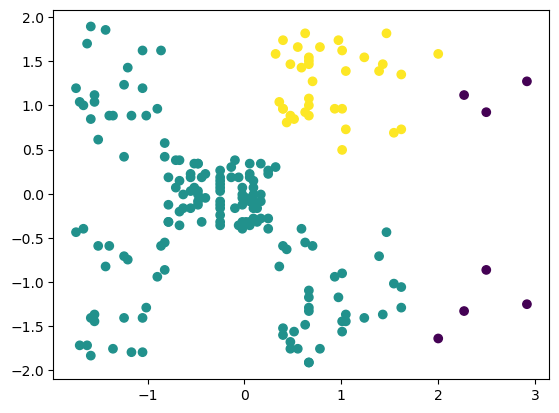

In [35]:
# 문제

# 2차원 시각화

plt.scatter(x = db_concat_2['Annual Income (k$)'], y = db_concat_2['Spending Score (1-100)'], c = db_concat_2['db_pred'])
plt.show()

예상했던 대로 밀도가 높은 경우 하나의 그룹으로 분류하고, 동떨어져 있는 데이터들은 별도의 그룹으로 분리했습니다.
이제는 하이퍼파라미터를 조정하면서 결과가 어떻게 달라지는지 확인해봅시다.

### 3-5 (20점) - 시각화3

(1) 하이퍼 파라미터를 바꾸어 보면서 실루엣 계수를 높이는 최적의 eps, min_samples를 찾아보세요. (5점)

(2) Silhouette 계수가 가장 높을 때 eps, min_samples, 그리고 그때의 Silhouette 계수를 찾아보세요. (5점)
- s_score 반복문을 올바르게 작성한 경우 (2.5점)
- max(result)값이 올바르게 나온 경우 (2.5점)

(3) 위의 결과를 바탕으로 다시 한번 모델링을 진행해주세요. (5점)

(4) 2차원 시각화를 해보고, 왜 유의미한 clustering 결과로 보기에 어려운지 서술하시오. (5점)
- 2차원 시각화를 올바르게 수행한 경우 (2.5점)
- 이유를 정확하게 서술한 경우 (2.5점)

In [36]:
# 문제

# 하이퍼파라미터 바꾸어 보기
# 확인할 범위는 eps의 경우 0.05부터 0.7까지, min_samples의 경우 2부터 6까지로 제한
# Silhouette 계수를 높이는 최적의 eps, min_samples 찾기

db_param_options = [[0.05, 2], [0.06, 2], [0.07, 2], [0.08, 2], [0.09, 2], [0.1, 2], [0.2, 2], [0.3, 2], [0.4, 2], [0.5, 2],
                   [0.05, 3], [0.06, 3], [0.07, 3], [0.08, 3], [0.09, 3], [0.1, 3], [0.2, 3], [0.3, 3], [0.4, 3], [0.5, 3],
                   [0.06, 4], [0.07, 4], [0.08, 4], [0.09, 4], [0.1, 4], [0.2, 4], [0.3, 4], [0.4, 4], [0.5, 4], [0.6, 4],
                   [0.08, 5], [0.09, 5], [0.1, 5], [0.2, 5], [0.3, 5], [0.4, 5], [0.5, 5], [0.6, 5],
                   [0.08, 6], [0.09, 6], [0.1, 6], [0.2, 6], [0.3, 6], [0.4, 6], [0.5, 6], [0.6, 6], [0.7, 6]]
result = []

for ep, min_sample in db_param_options:
    db = DBSCAN(eps=ep, min_samples=min_sample)
    db_clusters = db.fit_predict(data_1)
    result.append([ep, min_sample, silhouette_score(data_1, db_clusters)])

In [37]:
# 문제

s_score = []     # result에서 Silhouette 계수만 뽑아 저장할 리스트

for i in range(len(result)):
    s_score.append(s_score)

In [38]:
# 문제

# Silhouette 계수가 가장 높을 때 eps, min_samples, 그리고 그때의 Silhouette 계수

max(result)

[0.7, 6, 0.4248274189039687]

In [39]:
# 문제

# DBSCAN 모델링

db_model_3 = DBSCAN(eps = 0.7, min_samples = 6)
predict_3 = pd.DataFrame(db_model_3.fit_predict(data_1), columns=['db_pred'])

# 새로운 DataFrame 생성 - 기존 DataFrame과 학습 결과를 concat

db_concat_3 = pd.concat([data_1, predict_3], axis = 1)
db_concat_3

,Annual Income (k$),Spending Score (1-100),db_pred
0,-1.738999,-0.434801,0
1,-1.738999,1.195704,0
2,-1.700830,-1.715913,0
3,-1.700830,1.040418,0
4,-1.662660,-0.395980,0
...,...,...,...
195,2.268791,1.118061,0
196,2.497807,-0.861839,-1
197,2.497807,0.923953,-1
198,2.917671,-1.250054,-1


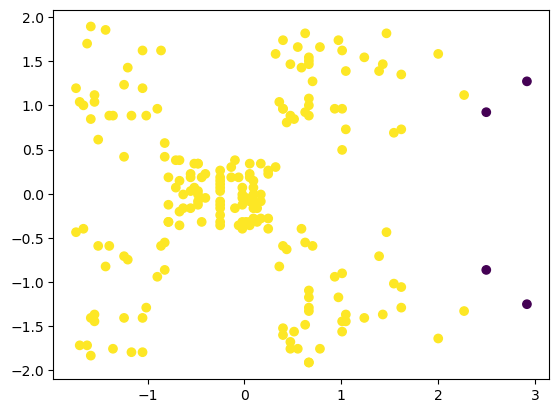

In [40]:
# 문제

# 2차원 시각화

plt.scatter(x = db_concat_3['Annual Income (k$)'], y = db_concat_3['Spending Score (1-100)'], c = db_concat_3['db_pred'])
plt.show()

##### 문제

스케일링을 하지 않을 경우 feature별로 분산이 달라서 왜곡이 발생해 군집화가 제대로 이루어지지 않는다 !!!!


#### 참고!
데이터 스케일링을 하지 않은 경우, DBSCAN 모델링 및 시각화 결과
각 Feature별로 분산이 달라 거리 측정 시 왜곡이 발생하며, Clustering이 제대로 되지 않는다.

# 문제4

## 붓꽃데이터세트에 적용하는 GMM & DBSCAN (50점)

### 다음의 빈칸을 채우시오

### 4-1. GMM 군집화는 군집화를 적용하고자하는 데이터가 여러개의 ______를 가진 데이터 집합들이 셖여서 생성된 것이라는 가정하에 군집화를 수행한다. 
(4점) 정규분포

### 4-2. DBSCAN을 구성하는 가장 중요한 두가지 파라미터는  __________과 이곳에 포함되는 최소 데이터의 개수 _______ 이다.
(4점) eps / min_samples

### 아래의 코드를 실행하시오.

In [41]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()
feature_names = ['sepal_length','sepal_width','petal_length','petal_width']

# 보다 편리한 데이타 Handling을 위해 DataFrame으로 변환
irisDF = pd.DataFrame(data=iris.data, columns=feature_names)
irisDF['target'] = iris.target

### 4-3 다음 코드의 None을 채워 코드를 조건에 맞게 완성하고 분류가 효과적으로 된 것인지 이유와 결과를 해석하시오. (코드완성 8점, 해석 4점)
n_components=4

In [42]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=4, random_state=0).fit(iris.data)
gmm_cluster_labels = gmm.predict(iris.data)

# 클러스터링 결과를 irisDF 의 'gmm_cluster' 컬럼명으로 저장
irisDF['gmm_cluster'] = gmm_cluster_labels
irisDF['target'] = iris.target

# target 값에 따라서 gmm_cluster 값이 어떻게 매핑되었는지 확인. 
iris_result = irisDF.groupby(['target'])['gmm_cluster'].value_counts()
print(iris_result)

target  gmm_cluster
0       1              50
1       0              33
        3              16
        2               1
2       2              45
        3               5
Name: count, dtype: int64


해석 : 제대로 이루어지지 않았다!! 타겟값과 gmm_cluster값이 1과 0에서 많이 헷갈린 듯 하다!!!!

### 아래의 코드를 실행하시오

In [43]:
### 클러스터 결과를 담은 DataFrame과 사이킷런의 Cluster 객체등을 인자로 받아 클러스터링 결과를 시각화하는 함수  
def visualize_cluster_plot(clusterobj, dataframe, label_name, iscenter=True):
    if iscenter :
        centers = clusterobj.cluster_centers_
        
    unique_labels = np.unique(dataframe[label_name].values)
    markers=['o', 's', '^', 'x', '*']
    isNoise=False

    for label in unique_labels:
        label_cluster = dataframe[dataframe[label_name]==label]
        if label == -1:
            cluster_legend = 'Noise'
            isNoise=True
        else :
            cluster_legend = 'Cluster '+str(label)
        
        plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], s=70,\
                    edgecolor='k', marker=markers[label], label=cluster_legend)
        
        if iscenter:
            center_x_y = centers[label]
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=250, color='white',
                        alpha=0.9, edgecolor='k', marker=markers[label])
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',\
                        edgecolor='k', marker='$%d$' % label)
    if isNoise:
        legend_loc='upper center'
    else: legend_loc='upper right'
    
    plt.legend(loc=legend_loc)
    plt.show()

In [44]:
from sklearn.datasets import make_blobs

# make_blobs() 로 300개의 데이터 셋, 3개의 cluster 셋, cluster_std=0.5 을 만듬. 
X, y = make_blobs(n_samples=300, n_features=2, centers=3, cluster_std=0.5, random_state=0)

# 길게 늘어난 타원형의 데이터 셋을 생성하기 위해 변환함. 
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)
# feature 데이터 셋과 make_blobs( ) 의 y 결과 값을 DataFrame으로 저장
clusterDF = pd.DataFrame(data=X_aniso, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y

### 4-4. 다음 코드의 None을 채워 시각화 하시오. (8점)

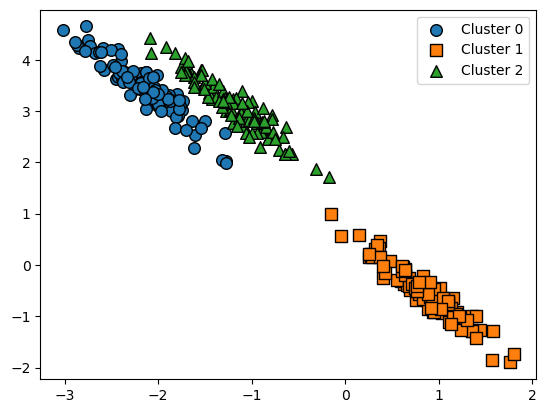

In [45]:
# 3개의 n_components기반 GMM을 X_aniso 데이터 셋에 적용 
gmm = GaussianMixture(n_components = 3, random_state=0)
gmm_label = gmm.fit(X_aniso).predict(X_aniso)
clusterDF['gmm_label'] = gmm_label
# 생성된 데이터세트를 target별로 다른 마커로 표시해 시각화
visualize_cluster_plot(None, clusterDF, 'gmm_label', iscenter = False)

### 4-5. DBSCAN 클래스를 이용해 eps=0.5, min_samples=7 로 정하여 붓꽃 데이터 세트를 군집화 하는 코드를 작성하시오 (10점)

In [46]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps = 0.5, min_samples = 7)
predict = pd.DataFrame(dbscan.fit_predict(irisDF), columns=['dbs_cluster'])

### 아래의 코드를 실행하시오

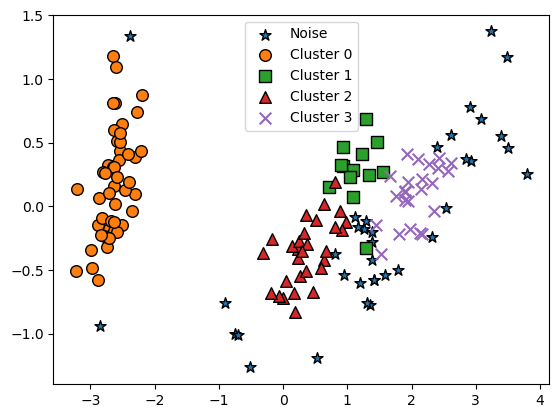

In [47]:
from sklearn.decomposition import PCA
# 2차원으로 시각화하기 위해 PCA n_componets=2로 피처 데이터 세트 변환
pca = PCA(n_components=2, random_state=0)
pca_transformed = pca.fit_transform(iris.data)
# visualize_cluster_2d( ) 함수는 ftr1, ftr2 컬럼을 좌표에 표현하므로 PCA 변환값을 해당 컬럼으로 생성
irisDF['ftr1'] = pca_transformed[:,0]
irisDF['ftr2'] = pca_transformed[:,1]
irisDF['dbscan_cluster'] = predict
visualize_cluster_plot(dbscan, irisDF, 'dbscan_cluster', iscenter=False)

### 4-6. eps를 0.7로 증가시켜 시각화 하는 코드를 작성하고 eps가 0.5일떄와 노이즈를 비교해 보시오 (코드 9점, 분석 3점)

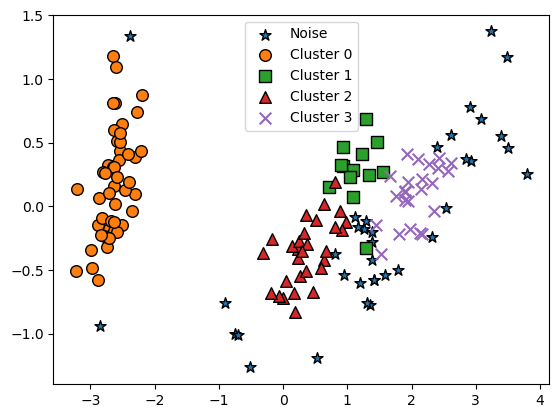

In [48]:
from sklearn.cluster import DBSCAN
dbscan_1 = DBSCAN(eps = 0.7, min_samples = 7)
predict_1 = pd.DataFrame(dbscan_1.fit_predict(irisDF), columns=['dbs_cluster'])
irisDF['dbscan_cluster_1'] = predict_1
visualize_cluster_plot(dbscan_1, irisDF, 'dbscan_cluster_1', iscenter=False)

해석 : eps가 0.7일 때 noise가 줄었다 !!!!

# 문제5. 고객 세그멘테이션

#### 고객 세그먼테이션(Customer Segmentation)은 다양한 기준으로 고객을 분류하는 기법을 지칭합니다. 고객 세그먼테이션은 CRM이나 마케팅의 중요 기반 요소입니다.</br>
#### 고객 세그먼테이션을 RFM 기법을 이용해서 진행할 예정인데, RFM 기법은 Recency(R), Frequency(F), Monetary Value(M)의 각 앞글자를 합한 것으로서 각 단어의 의미는 다음과 같습니다. </br>
   * RECENCY (R) : 가장 최근 상품 구입 일에서 오늘까지의 기간 </br>
   * FREQUENCY (F) : 상품 구매 횟수 </br>
   * MONETARY VALUE (M) : 총 구매 금액

### 다음 코드를 실행하여 라이브러리와 데이터셋을 불러와주세요.

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

rfm_df = pd.read_csv('rfm.csv', index_col=0)

### 5-1. 왜곡 정도가 매우 높은 데이터 세트에 K-평균 군집을 적용하면 중심의 개수를 증가시키더라도 변별력이 떨어지는 군집화가 수행됩니다. <br>
### 따라서 군집화의 변별력을 높이기 위해 위의 rfm_df 데이터를 StandardScaler를 통해 정규화하여 rfm_df_scaled 데이터프레임을 만들어주세요. (15점)

In [50]:
# 정규화 수행
rfm_df_scaled = pd.DataFrame(StandardScaler().fit_transform(rfm_df), columns = rfm_df.columns)
rfm_df_scaled.head()

,Amount,Frequency,Recency
0,-0.723738,-0.752888,2.301611
1,1.731617,1.042467,-0.906466
2,0.300128,-0.463636,-0.183658
3,0.277517,-0.044720,-0.738141
4,-0.533235,-0.603275,2.143188


### 5-2. 다음 함수는 군집별 평균 실루엣 계수를 시각화하는 함수입니다. 다음 코드 중 실루엣 계수를 구하는 코드를 채워주세요. (15점)

In [51]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 실루엣 계수를 면적으로 시각화한 함수 작성  
def visualize_silhouette(cluster_lists, X_features): 
    
    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math
    
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

### 다음 함수는 군집 개수별로 군집화 구성을 시각화하는 함수입니다. 이건 위에랑은 다르게 문제가 아니니 편하게 실행해주세요.

In [52]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 클러스터링 결과를 시각화 
def visualize_kmeans_plot_multi(cluster_lists, X_features):
    
    from sklearn.cluster import KMeans
    from sklearn.decomposition import PCA
    import pandas as pd
    import numpy as np
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 만큼의 sub figures를 가지는 axs 생성 
    n_cols = len(cluster_lists)
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 입력 데이터의 FEATURE가 여러개일 경우 2차원 데이터 시각화가 어려우므로 PCA 변환하여 2차원 시각화
    pca = PCA(n_components=2)
    pca_transformed = pca.fit_transform(X_features)
    dataframe = pd.DataFrame(pca_transformed, columns=['PCA1','PCA2'])
    
     # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 KMeans 클러스터링 수행하고 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링으로 클러스터링 결과를 dataframe에 저장. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(pca_transformed)
        dataframe['cluster']=cluster_labels
        
        unique_labels = np.unique(clusterer.labels_)
        markers=['o', 's', '^', 'x', '*']
       
        # 클러스터링 결과값 별로 scatter plot 으로 시각화
        for label in unique_labels:
            label_df = dataframe[dataframe['cluster']==label]
            if label == -1:
                cluster_legend = 'Noise'
            else :
                cluster_legend = 'Cluster '+str(label)           
            axs[ind].scatter(x=label_df['PCA1'], y=label_df['PCA2'], s=70,\
                        edgecolor='k', marker=markers[label], label=cluster_legend)

        axs[ind].set_title('Number of Cluster : '+ str(n_cluster))    
        axs[ind].legend(loc='upper right')
    
    plt.show()

### 다음 코드를 실행하여 군집 개수를 2~5개까지 변화시키면서 개별 군집의 실루엣 계수 값과 데이터 구성을 함께 알아봅시다.

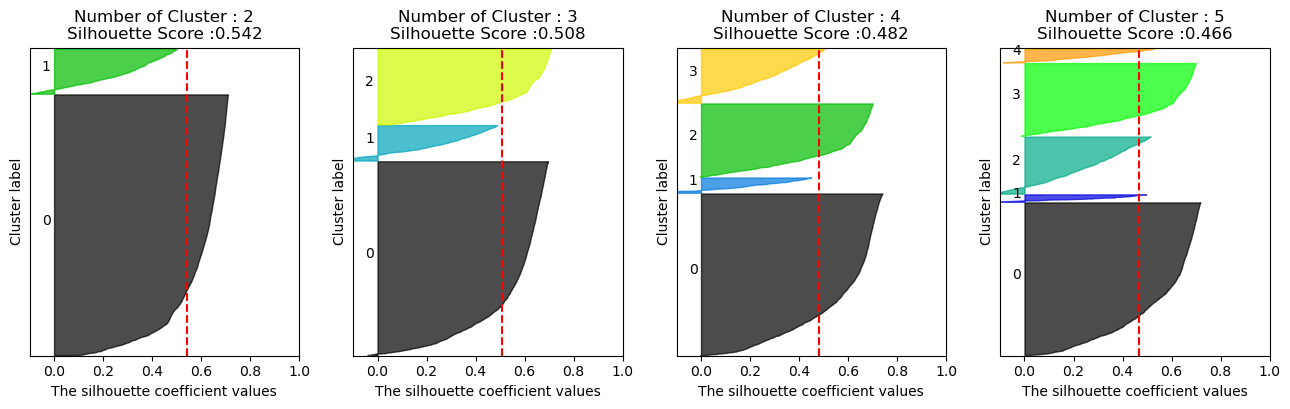

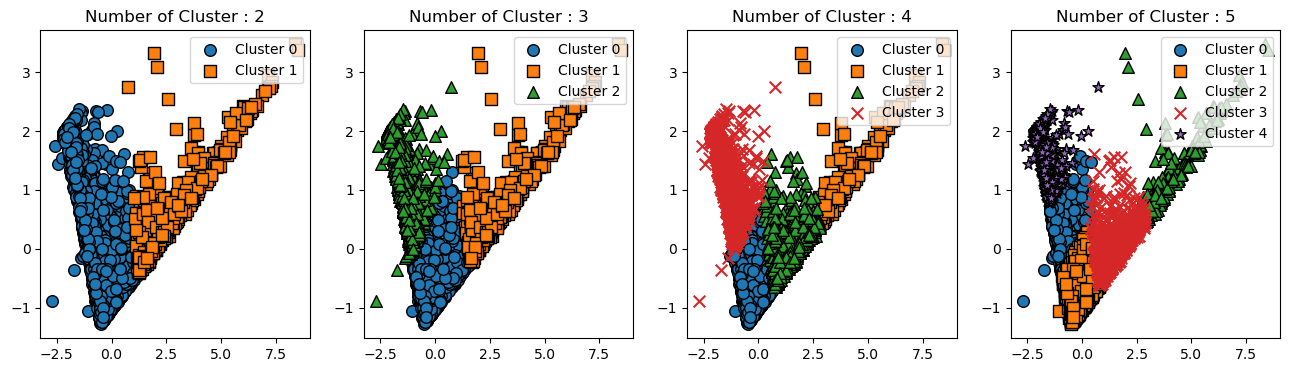

In [53]:
visualize_silhouette([2,3,4,5], rfm_df_scaled)
visualize_kmeans_plot_multi([2,3,4,5], rfm_df_scaled)

### 5-3. 위 코드의 결과를 보고 실루엣 계수 값이 가장 높은 군집 개수(Number of Cluster)를 적어주세요. (5점)

답 : 2개

### 5-4. 위 코드의 결과를 보고 가장 군집화가 잘 된 군집 개수(Number of Cluster)를 적어주세요. (5점)

답 : 5개

### 5-5. 실루엣 계수 값이 가장 높은 군집 개수와 가장 군집화가 잘 된 군집 개수(Number of Cluster)가 같게 나왔나요? (예 / 아니오) </br>
### 만약 다르게 나왔다면 그 이유를 간략하게 설명해주세요. (10점)

답 : 아니오 / 분포의 분산도 신경을 써야 하기 때문입니다 1!!!!!!!